In [1]:
import tensorflow as tf
import keras

loaded_model = tf.keras.models.load_model('C:/Users/ehemingway/Downloads/drive-download-20230110T185119Z-001/Model_Distortion_Coefficient_320x340_3x3_MSE_128_20230105')
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 318, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 119, 159, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 117, 157, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 58, 78, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 76, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 272384)            0

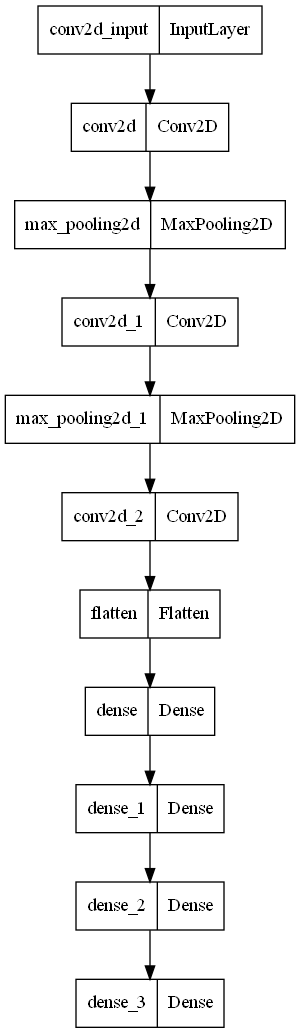

In [2]:
from keras.utils import plot_model
plot_model(loaded_model,to_file='model.png')

In [4]:
from keras.models import Model

inp = loaded_model.input                                  # input placeholder
out = [layer.output for layer in loaded_model.layers]            # all layer outputs
activation_model = Model(inputs=loaded_model.input, outputs=out)

from PIL import Image
import numpy as np

imName = '0075_19'
input_image = Image.open('Training Set GS 1000 320x240/'+imName+'.jpg')
x = np.array(input_image)
x = np.expand_dims(x,axis=0)
x = x / 255.

input_data = x
activations = activation_model.predict(input_data)

# Print the output of each layer
for i, activation in enumerate(activations):
    print("Layer {} output shape: {}".format(i, activation.shape))


1/1 [==============================] - 0s 211ms/step
Layer 0 output shape: (1, 238, 318, 32)
Layer 1 output shape: (1, 119, 159, 32)
Layer 2 output shape: (1, 117, 157, 64)
Layer 3 output shape: (1, 58, 78, 64)
Layer 4 output shape: (1, 56, 76, 64)
Layer 5 output shape: (1, 272384)
Layer 6 output shape: (1, 64)
Layer 7 output shape: (1, 16)
Layer 8 output shape: (1, 4)
Layer 9 output shape: (1, 1)


In [5]:
output_of_layer_0 = activations[0]
output_of_layer_1 = activations[1]
output_of_layer_2 = activations[2]
output_of_layer_3 = activations[3]
output_of_layer_4 = activations[4]
import matplotlib.pyplot as plt
import os
curDir = os.getcwd()
lowerDir = 'Convolutional First Layer Feature Maps for '+imName
path = os.path.join(curDir,lowerDir)
os.mkdir(path)
for i in range(32):
    img = Image.fromarray(output_of_layer_0[0,:,:,i]*255)
    img = img.convert('L')
    img = img.resize((1280,960))
    img.save(path+'/'+str(i)+'.jpg')

lowerDir = 'Convolutional Second Layer Feature Maps for '+imName
path = os.path.join(curDir,lowerDir)
os.mkdir(path)
for i in range(64):
    img = Image.fromarray(output_of_layer_2[0,:,:,i]*255)
    img = img.convert('L')
    img = img.resize((1280,960))
    img.save(path+'/'+str(i)+'.jpg')

lowerDir = 'Convolutional Third Layer Feature Maps for '+imName
path = os.path.join(curDir,lowerDir)
os.mkdir(path)
for i in range(64):
    img = Image.fromarray(output_of_layer_4[0,:,:,i]*255)
    img = img.convert('L')
    img = img.resize((1280,960))
    img.save(path+'/'+str(i)+'.jpg')

In [6]:
output_of_layer_9 = activations[9]
k = -output_of_layer_9

import scipy

xSuckInt = np.array([0]*320*240).reshape(240,320).astype(np.uint8)
ySuckInt = np.array([0]*320*240).reshape(240,320).astype(np.uint8)
c = 0
for xOut in range(-160,160):
    r = 0
    for yOut in range(-120,120):
        rOut = (xOut**2+yOut**2)**0.5/(120**2+160**2)**0.5
        theta = np.arctan2(yOut,xOut)
        rSuck = rOut*(1+k*rOut**2)
        xSuck = rSuck*np.cos(theta)
        ySuck = rSuck*np.sin(theta)
        xSuckInt[r,c]=xSuck*160
        ySuckInt[r,c]=ySuck*120
        r = r + 1
    c = c + 1

undistortedIm = scipy.interpolate.interp2d(xSuckInt,ySuckInt,input_data[0,:,:])


c:\Users\ehemingway\anaconda3\envs\spyder-env\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the additional knot would
coincide with an old one. Probable cause: s too small or too large
a weight to an inaccurate data point. (fp>s)
	kx,ky=1,1 nx,ny=210,116 m=76800 fp=314.887646 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


In [9]:
imageUndistort = Image.fromarray(np.uint8(undistortedIm(xSuckInt.reshape(-1),ySuckInt.reshape(-1))*255),'L')

RuntimeError: Cannot produce output of size 76800x76800 (size too large)